In [1]:
#Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = '/Users/andrewfearney27/Instacart Basket Analysis'
customers = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'customers.csv'))


In [3]:
#Import the most up-to-date project data
instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'custs_ords_prods_combined.pkl'))

In [4]:
#2 Create a bar chart, a histogram, a scatterplot and a line chart
#Bar Chart
print(instacart.columns)


Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'first_name', 'surname', 'gender',
       'state', 'age', 'date_joined', 'n_dependants', 'marital_status',
       'income', '_merge'],
      dtype='object')


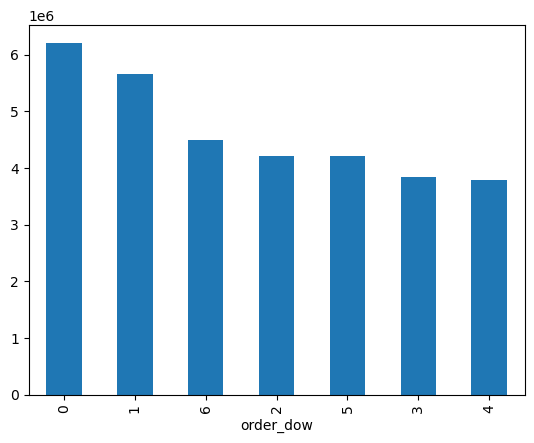

In [5]:
bar = instacart['order_dow'].value_counts().plot.bar()

In [6]:
#Histogram
print(instacart.columns)

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'first_name', 'surname', 'gender',
       'state', 'age', 'date_joined', 'n_dependants', 'marital_status',
       'income', '_merge'],
      dtype='object')


<Axes: ylabel='Frequency'>

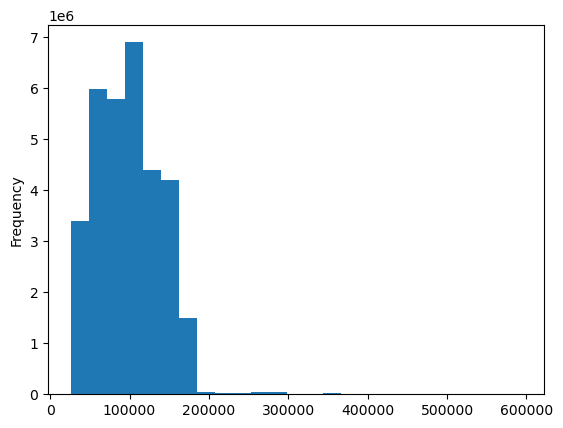

In [7]:
instacart['income'].plot.hist(bins=25)

In [8]:
#Scatterplot
print(instacart.columns)

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'first_name', 'surname', 'gender',
       'state', 'age', 'date_joined', 'n_dependants', 'marital_status',
       'income', '_merge'],
      dtype='object')


<Axes: xlabel='order_number', ylabel='income'>

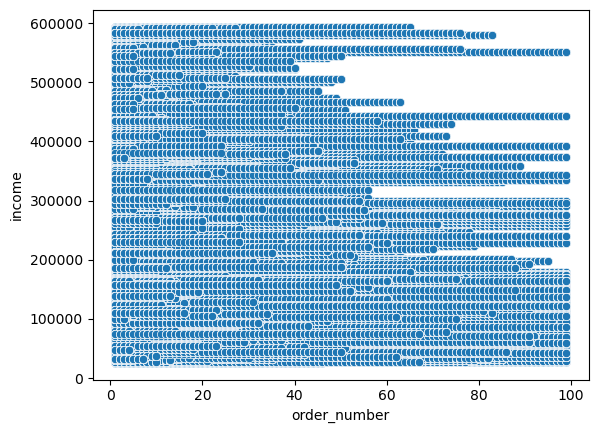

In [9]:
sns.scatterplot(x='order_number', y='income', data=instacart)


In [10]:
#Line Chart
#Create a random sample by generating a seed
np.random.seed(4)

In [11]:
#Create a dev list based on the data split we want (70/30)
dev = np.random.rand(len(instacart)) <= 0.7

In [12]:
#Split the dataframe into two samples
big = instacart[dev]
small = instacart[~dev]

In [13]:
#Reduce the samples to only the columns needed
instacart_2 = small[['order_hour_of_day', 'income']]

<Axes: xlabel='order_hour_of_day', ylabel='income'>

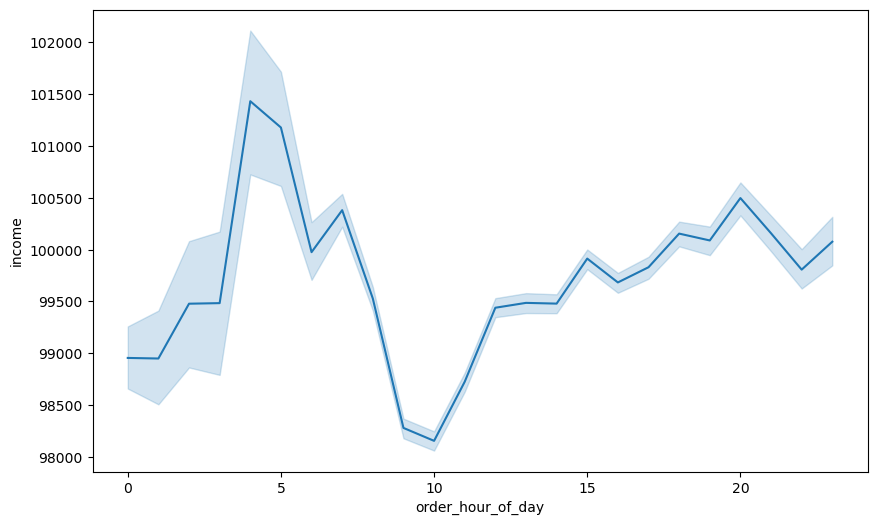

In [14]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=instacart_2, x='order_hour_of_day', y='income')

In [15]:
plt.show()

<Axes: ylabel='Frequency'>

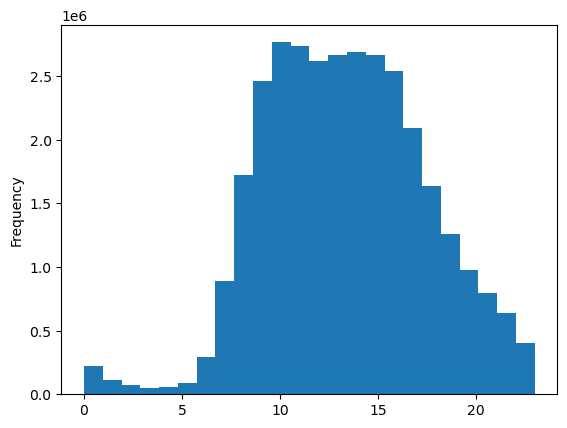

In [16]:
#Q3 Create a histogram of the "order_hour_of_day" column
instacart['order_hour_of_day'].plot.hist(bins=24)


In [17]:
#The histogram exhibits peaks during certain hours, which would indicate the times of day when the most orders are placed.
#If this peak occurs during midday or early evening, it might suggest that customers prefer to shop during their lunch hours or after work. 

In [18]:
#Q4 Create a bar chart from the "loyalty_flag" column
path = '/Users/andrewfearney27/Instacart Basket Analysis/02 Data/Prepared Data'
file_name = 'orders_products_combined_merged_new_variables_derived.pkl'
instacart = pd.read_pickle(os.path.join(path, file_name))
print(instacart.columns)


Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'max_order', 'loyalty_flag', 'avg_price',
       'spending_flag', 'median_days_since_order', 'order_frequency_flag'],
      dtype='object')


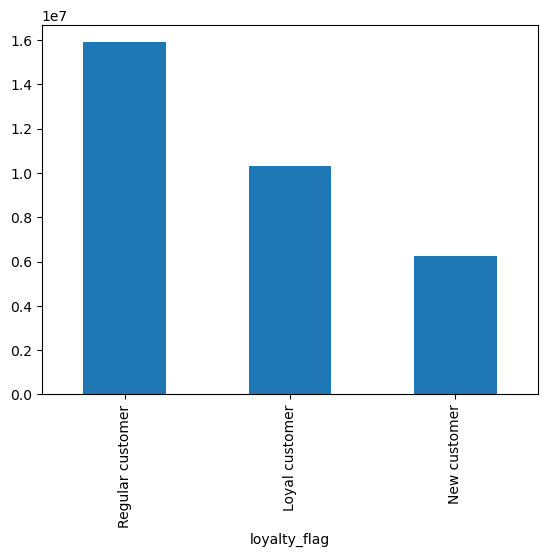

In [19]:
if 'loyalty_flag' in instacart.columns:
    bar = instacart['loyalty_flag'].value_counts().plot.bar()
else:
    print("loyalty_flag column not found in the dataframe.")


In [20]:
#Q5 Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day
np.random.seed(4)

In [21]:
dev = np.random.rand(len(instacart)) <= 0.7

In [22]:
# Split the dataframe into two samples
big = instacart[dev]
small = instacart[~dev]

In [23]:
#Reduce the samples to only the columns needed
instacart_2 = small[['order_hour_of_day', 'prices']]

In [24]:
#Check if the subset of the sample was made properly
print(instacart_2.head())

    order_hour_of_day  prices
0                   8     9.0
2                   8     4.4
3                   8     4.7
6                   7     3.0
10                  7     4.0


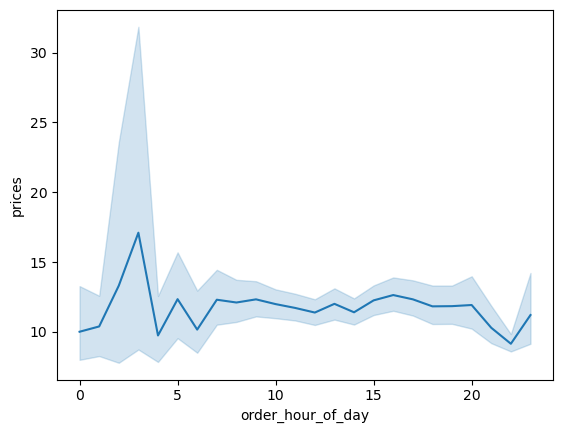

In [25]:
sns.lineplot(data=instacart_2, x='order_hour_of_day', y='prices')
plt.show()

In [ ]:
#Q6 Determine whether there’s a connection between age and family situation 
#Load the main instacart data
instacart = pd.read_pickle(os.path.join(prepared_data_path, 'orders_products_combined_merged_new_variables_derived.pkl'))

In [ ]:
#Load the customers data
customers = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'customers.csv'))

In [ ]:
#Display the columns of both dataframes
print("Instacart columns before merge:", instacart.columns)
print("Customers columns before rename:", customers.columns)

In [ ]:
#Load the main instacart data
instacart = pd.read_pickle(os.path.join(prepared_data_path, 'orders_products_combined_merged_new_variables_derived.pkl'))

In [ ]:
#Load the customers data
customers = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'customers.csv'))


In [ ]:
#Display the columns of both dataframes
print("Instacart columns before merge:", instacart.columns)
print("Customers columns before rename:", customers.columns)

In [ ]:
#Rename columns in customers to avoid conflicts
customers.rename(columns={'Age': 'customer_age', 'n_dependants': 'customer_n_dependants'}, inplace=True)
print("Customers columns after rename:", customers.columns)


In [ ]:
#Perform the merge
merged_instacart = instacart.merge(customers, on='user_id', how='left', suffixes=('', '_y'))


In [ ]:
#Drop duplicate columns created during the merge
merged_instacart.drop([col for col in merged_instacart.columns if '_y' in col], axis=1, inplace=True)

In [ ]:
#Display the first few rows of the merged DataFrame to verify the merge
print(merged_instacart.head())


In [ ]:
#Check if the merge is successful and the necessary columns are present
print("Columns after merge and drop duplicates:", merged_instacart.columns)

In [ ]:
#Ensure that 'customer_age' and 'customer_n_dependants' columns exist
if 'customer_age' in merged_instacart.columns and 'customer_n_dependants' in merged_instacart.columns:
    # Reduce the sample to only the columns needed
    instacart_3 = merged_instacart[['customer_age', 'customer_n_dependants']]
    # Check if the subset of the sample was made properly
    print(instacart_3.head())
else:
    print("The columns 'customer_age' and 'customer_n_dependants' are not present in the DataFrame.")


In [ ]:
#Create a line chart
plt.figure(figsize=(10,6))
sns.lineplot(data=instacart_3, x='customer_age', y='customer_n_dependants')

In [ ]:
#7 Age and spending power scatterplot

In [ ]:
print(instacart_4.head())


In [ ]:
#Create a scatterplot
scatterplot = sns.scatterplot(x='customer_age', y='income', data=instacart_4)
plt.xlabel('Customer Age')
plt.ylabel('Income')
plt.title('Scatterplot of Age vs Income')
plt.show()

In [ ]:
#Analysis
#There is a wide range of incomes among the younger age groups, particularly from ages 20 to around 40, with a concentration at the lower end of the income scale.
#Starting from around age 40 and onwards, there appears to be an upward trend in income, with many of the data points concentrated in the higher income brackets. #
#This could suggest that income increases with age.


In [ ]:
#Q7 Save and export visualisations

In [ ]:
#Define the paths
base_path = '/Users/andrewfearney27/Instacart Basket Analysis'
data_path = os.path.join(base_path, '02 Data', 'Prepared Data')
visualization_path = os.path.join(base_path, '04 Analysis', 'Visualizations')


In [ ]:
#Ensure the visualization directory exists
os.makedirs(visualization_path, exist_ok=True)

In [ ]:
#Load the data
instacart = pd.read_pickle(os.path.join(data_path, 'custs_ords_prods_combined.pkl'))
customers = pd.read_csv(os.path.join(base_path, '02 Data', 'Original Data', 'customers.csv'))

In [ ]:
#Ensure 'user_id' is of the same data type in both dataframes
instacart['user_id'] = instacart['user_id'].astype(str)
customers['user_id'] = customers['user_id'].astype(str)

In [ ]:
#Display columns for verification
print("Instacart columns before merge:", instacart.columns)
print("Customers columns:", customers.columns)

In [ ]:
#Merge the dataframes
merged_instacart = pd.merge(instacart, customers, on='user_id', how='left')


In [ ]:
#Drop duplicate columns created during the merge
merged_instacart.drop(columns=[col for col in merged_instacart.columns if '_y' in col], inplace=True)


In [ ]:
#Check if columns are present before renaming
print("Columns after merge:", merged_instacart.columns)

#Rename columns to avoid conflicts
merged_instacart.rename(columns={'Age': 'customer_age', 'n_dependants': 'customer_n_dependants'}, inplace=True)

#Display columns after merge and rename for verification
print("Columns after merge and rename:", merged_instacart.columns)

#Check if columns exist
if 'customer_age' not in merged_instacart.columns or 'customer_n_dependants' not in merged_instacart.columns:
    print("One or both of the columns 'customer_age' and 'customer_n_dependants' are missing in the merged_instacart dataframe.")
else:
    print("Columns 'customer_age' and 'customer_n_dependants' are present in the merged_instacart dataframe.")
    

In [ ]:
#Ensure the visualization directory exists
os.makedirs(visualization_path, exist_ok=True)

# Load the data
instacart = pd.read_pickle(os.path.join(data_path, 'custs_ords_prods_combined.pkl'))
customers = pd.read_csv(os.path.join(base_path, '02 Data', 'Original Data', 'customers.csv'))

# Ensure 'user_id' is of the same data type in both dataframes
instacart['user_id'] = instacart['user_id'].astype(str)
customers['user_id'] = customers['user_id'].astype(str)

# Merge the dataframes
merged_instacart = pd.merge(instacart, customers, on='user_id', how='left')

# Drop duplicate columns created during the merge
merged_instacart.drop(columns=[col for col in merged_instacart.columns if '_y' in col], inplace=True)

# Rename columns to avoid conflicts
merged_instacart.rename(columns={'Age': 'customer_age', 'n_dependants': 'customer_n_dependants'}, inplace=True)


In [ ]:
# Plotting and saving figures
try:
    line = sns.lineplot(data=merged_instacart, x='order_hour_of_day', y='income')
    line.figure.savefig(os.path.join(visualization_path, 'change_in_price_over_hours_of_the_day.png'))
    plt.clf()

    line_2 = sns.lineplot(data=merged_instacart, x='customer_age', y='customer_n_dependants')
    line_2.figure.savefig(os.path.join(visualization_path, 'age_vs_n_dependants.png'))
    plt.clf()

    scatterplot = sns.scatterplot(x='customer_age', y='income', data=merged_instacart)
    scatterplot.figure.savefig(os.path.join(visualization_path, 'change_in_spending_power_over_age.png'))
    plt.clf()
except ValueError as e:
    print(f"ValueError: {e}")